In [1]:
import matplotlib.pyplot as plt
import numpy
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
points = numpy.random.rand(6,2)
vor = Voronoi(points)

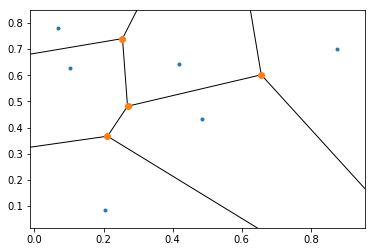

In [4]:
fig = voronoi_plot_2d(vor)

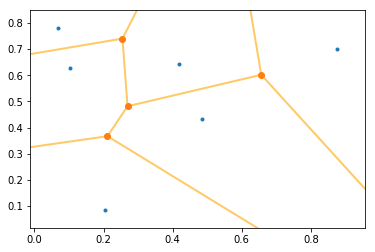

In [5]:
fig = voronoi_plot_2d(vor, show_vertices=True, line_colors='orange',
                 line_width=2, line_alpha=0.6, point_size=6)
plt.show()

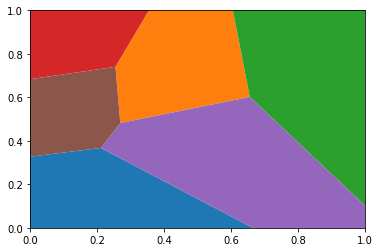

In [6]:
points = numpy.append(points, 
                      [[999,999], [-999,999], [999,-999], [-999,-999]], 
                      axis = 0)
vor = Voronoi(points)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.xlim([0,1]), plt.ylim([0,1])
plt.show()

In [7]:
import arcpy

In [8]:
def getColor(colName, colNum):
    cm = plt.cm.get_cmap(colName)
    col = [cm(float(i)/len(colNum)) for i in range(len(colNum))]
    cols = {}
    for c in range(len(col)):
        f = "#"
        for c1 in col[c]:
            cc = "{0}".format(hex(int(c1*255)))[2:]
            if len(cc) < 2:
                cc = "0"+cc
            f+=cc
        cols[colNum[c]] = f
    return cols

In [9]:
dt = arcpy.da.FeatureClassToNumPyArray("./data/weather.shp",
                                       ["mean","Shape@XY"])

In [10]:
cols = getColor("Greens",list(set(dt['mean'])))

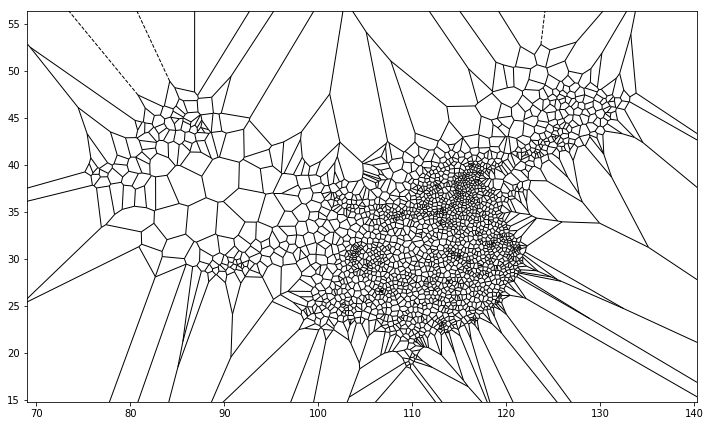

In [11]:
vor = Voronoi(dt["Shape@XY"])
plt.figure(figsize=(12,9))
ax = plt.subplot(111, aspect='equal')
voronoi_plot_2d(vor,show_vertices=False,show_points=False,ax=ax)
plt.show()

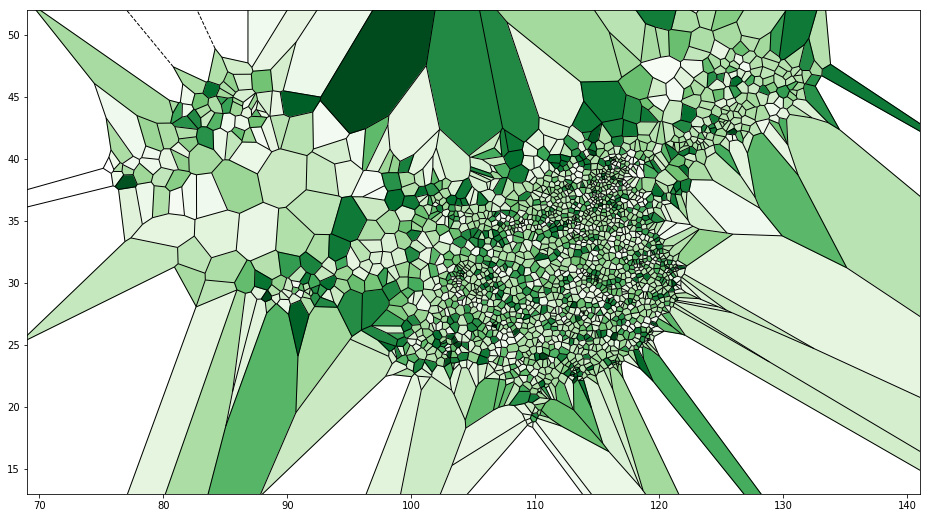

In [12]:
points = numpy.append(dt["Shape@XY"], 
                      [[999,999], [-999,999], [999,-999], [-999,-999]], 
                      axis = 0)

x = -1
plt.figure(figsize=(16,14))
ax = plt.subplot(111, aspect='equal')
voronoi_plot_2d(vor,show_vertices=False,show_points=False,ax=ax)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        if x > 0:
            col = cols[dt['mean'][x]]
            plt.fill(*zip(*polygon),color=col)
        x+=1

plt.xlim([69,141]), plt.ylim([13,52])
plt.show()